# TensorFlow 선형회귀 실습: 보스턴 주택가격 데이터

이번 실습에서는 보스턴 주택가격 데이터를 활용하여 선형회귀를 적용해봅니다.




## Dataset 설명
- California Housing Dataset은 캘리포니아 주의 주택 가격과 관련된 다양한 특성들을 포함하고 있습니다.
- 이 데이터셋은 주택 가격 예측과 관련된 머신러닝 모델을 개발하는 데 자주 사용됩니다.
- 데이터셋은 8개의 특성과 1개의 타겟 변수로 구성되어 있습니다.

### 특성 설명:
- MedHouseValue (target): 주택 가격 (단위: 10만 달러)
- MedInc: 중간 소득 (단위: 10,000 달러)
- HouseAge: 주택 연령 (단위: 년)
- AveRooms: 평균 방 개수
- AveBedrms: 평균 침실 개수
- Population: 인구 수
- AveOccup: 평균 가구원 수
- Latitude: 위도
- Longitude: 경도

## 실습 목표
1. 데이터 불러오기 및 전처리
2. 데이터 시각화
3. TensorFlow를 활용한 선형회귀 모델 정의 및 학습
4. 결과 해석 및 시각화

In [6]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'
from matplotlib import rc
# NanumGothic 사용
rc('font', family='NanumGothic')
rc('font', family='Malgun Gothic')


## 문제 1. 데이터 불러오기

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# ----------------------
# 1. 데이터 불러오기
# ----------------------
california = fetch_california_housing()
print(california.data.shape)
X = california.data         # Attributes (8개 특성)
y = california.target       # Target (주택가격)

print("X shape:", X.shape, "y shape:", y.shape)

(20640, 8)
X shape: (20640, 8) y shape: (20640,)


## 문제 2. 데이터 시각화

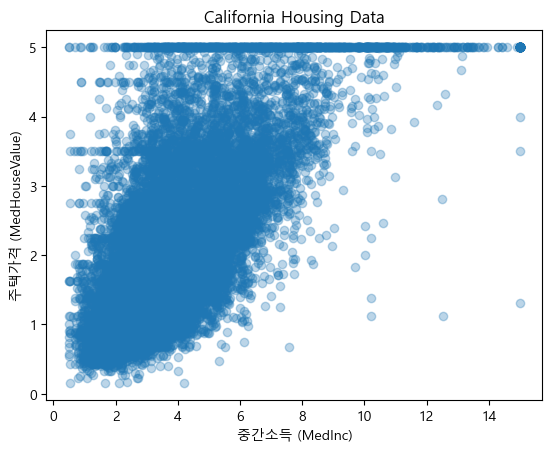

In [9]:
plt.scatter(X[:, 0], y, alpha=0.3)
plt.xlabel("중간소득 (MedInc)")
plt.ylabel("주택가격 (MedHouseValue)")
plt.title("California Housing Data")
plt.show()

## 문제 3. 모델 정의 및 학습

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

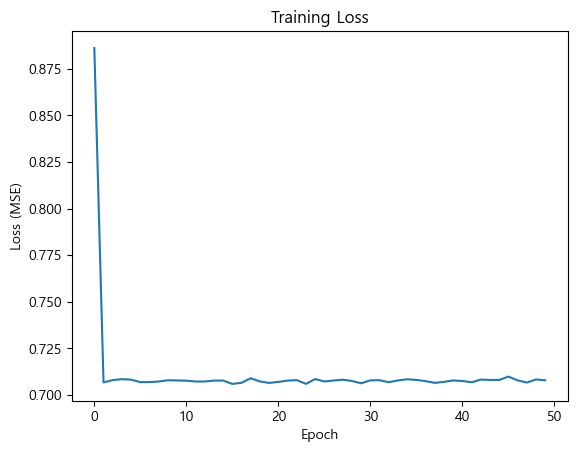

In [10]:
## 2. 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mse')

history = model.fit(X[:, 0], y, epochs=50, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss")
plt.show()

## 문제 4. 학습 결과 확인

학습된 기울기 W: 0.423, 절편 b: 0.461
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


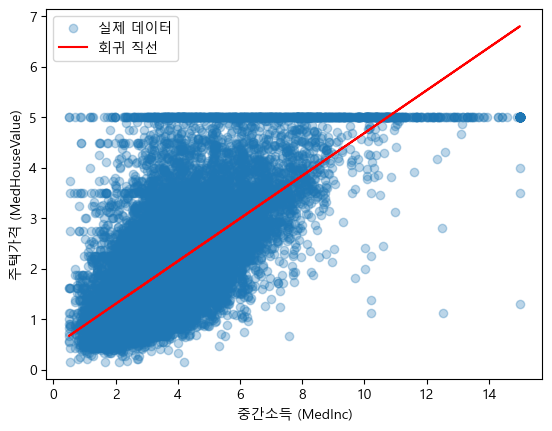

In [11]:
W, b = model.layers[0].get_weights()
print(f"학습된 기울기 W: {W[0][0]:.3f}, 절편 b: {b[0]:.3f}")

y_pred = model.predict(X[:, 0])

plt.scatter(X[:, 0], y, alpha=0.3, label="실제 데이터")
plt.plot(X[:, 0], y_pred, color='red', label="회귀 직선")
plt.xlabel("중간소득 (MedInc)")
plt.ylabel("주택가격 (MedHouseValue)")
plt.legend()
plt.show()

## 생각해보기
- 중간소득(MedInc) 외에 다른 특성들을 사용하여 모델을 개선할 수 있는가?

네 개선할 수 있습니다.

1. 캘리포니아 주택 가격은 중간소득만으로 설명하기 어려움

2. HouseAge, AveRooms, Population, Latitude, Longitude 같은 변수들이 주택 가격에 큰 영향을 미침

3. 따라서 다중 선형회귀(Multiple Linear Regression) 나 신경망 모델로 확장하면,
   단일 특성 대비 예측 성능(R², MSE)이 개선됩니다.